# Getting started

Once you've chosen your scenario from the README, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

## Scenario and Problem Statement

In [2]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt

from sklearn import datasets

import numpy as np
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv("../../assets/Iowa_Liquor_sales_sample_10pct.csv", parse_dates = ["Date"])


# df["date"] = pd.to_datetime( df["Date"] )

## Load the data into a DataFrame
# pd.read_csv()

## Transform the dates if needed, e.g.
#df["Date"] = pd.to_datetime(df["Date"], format="%m-%d-%y")
df["State Bottle Cost"]   = df["State Bottle Cost"].apply( lambda cost: float(cost.replace("$","")))
df["State Bottle Retail"] = df["State Bottle Retail"].apply( lambda cost: float(cost.replace("$","")))
df["Sale (Dollars)"]      = df["Sale (Dollars)"].apply( lambda cost: float(cost.replace("$","")))
df["Month"] = df["Date"].apply(lambda date: date.month)
df["quarter"] = df.Date.apply(lambda date: date.quarter)
#df = df.set_index("Date").sort_index()

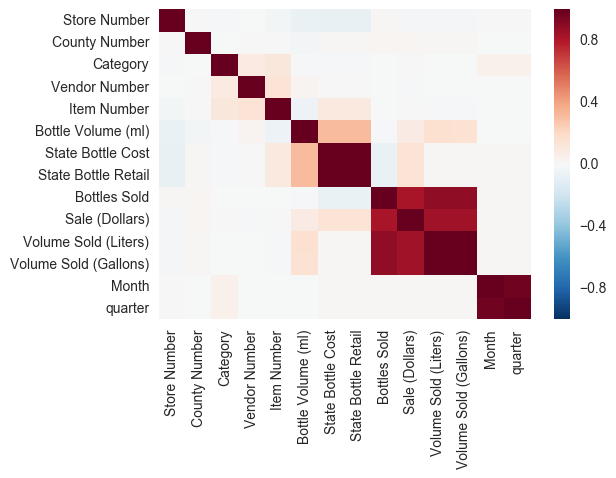

In [49]:
sns.heatmap(df.corr())

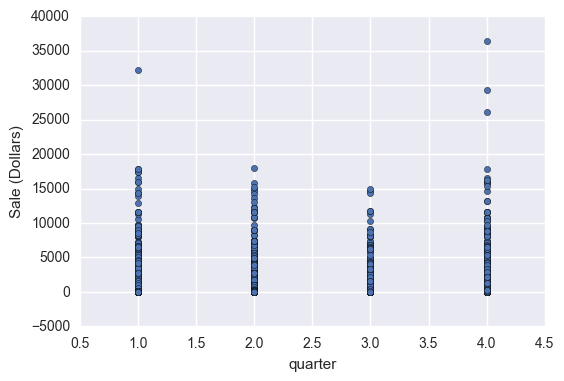

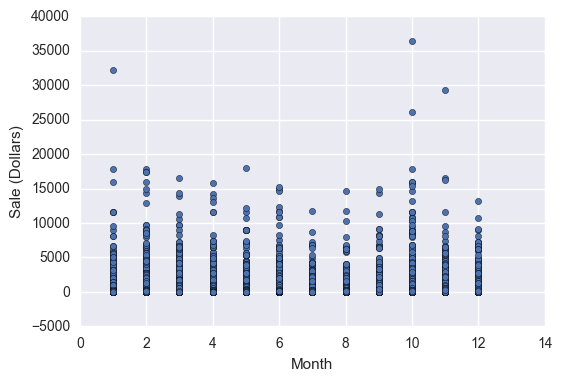

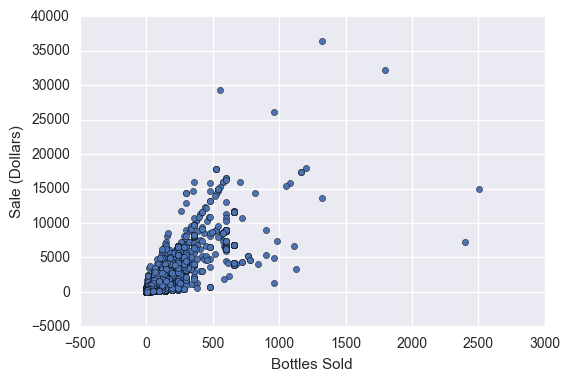

In [54]:
for column in ['quarter','Month', 'Bottles Sold']:
    df.plot.scatter(x=column, y='Sale (Dollars)')


In [47]:
df.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Month,quarter
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38,11,4
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40,3,1
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34,2,1
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77,2,1
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55,8,3


In [18]:
df.tail()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Month,quarter
270950,2015-12-22,4057,DES MOINES,50316,77.0,Polk,1022100.0,TEQUILA,410,88291,Patron Tequila Silver Mini,300,20.30,30.45,4,121.80,1.20,0.32,12,4
270951,2015-11-04,5151,IDA GROVE,51445,47.0,Ida,1011200.0,STRAIGHT BOURBON WHISKIES,259,17956,Evan Williams Str Bourbon,750,7.47,11.21,3,33.63,2.25,0.59,11,4
270952,2015-10-20,5152,WATERLOO,50702,7.0,Black Hawk,1011300.0,TENNESSEE WHISKIES,85,26826,Jack Daniels Old #7 Black Lbl,750,15.07,22.61,6,135.66,4.50,1.19,10,4
270953,2015-11-20,3562,WEST BURLINGTON,52655,29.0,Des Moines,1082900.0,MISC. IMPORTED CORDIALS & LIQUEURS,192,65258,Jagermeister Liqueur,1750,26.05,39.08,6,234.48,10.50,2.77,11,4
270954,2015-01-27,4446,URBANDALE,50322,77.0,Polk,1031080.0,VODKA 80 PROOF,260,37993,Smirnoff Vodka 80 Prf,200,2.75,4.13,8,33.04,1.60,0.42,1,1


In [34]:
df.columns

Index([u'Date', u'Store Number', u'City', u'Zip Code', u'County Number',
       u'County', u'Category', u'Category Name', u'Vendor Number',
       u'Item Number', u'Item Description', u'Bottle Volume (ml)',
       u'State Bottle Cost', u'State Bottle Retail', u'Bottles Sold',
       u'Sale (Dollars)', u'Volume Sold (Liters)', u'Volume Sold (Gallons)',
       u'Month', u'quarter'],
      dtype='object')

In [54]:
df.shape


(270955, 20)

In [101]:
type(df.columns)

pandas.indexes.base.Index

In [35]:
df.rename(columns = {'Store Number': 'Store_Number', 'Zip Code' : 'Zip_Code', 'County Number': 'County_Number', 
                    'Category Name': 'Category_Name', 'Vendor Number': 'Vendor_Number', 'Item Number': 'Item_Nymber',
                     'Item Description': 'Item_Description', 'Bottle Volume (ml)': 'Bottle_Volume(ml)',
                     'State Bottle Cost': 'State_Bottle_Cost', 'State Bottle Retail': 'State_Bottle_Retail', 
                     'Bottles Sold': 'Bottles_Sold', 'Sale (Dollars)': 'Sale(Dollars)', 
                     'Volume Sold (Liters)': 'Volume_Sold(Liters)', 'Volume Sold (Gallons)': 'Volume_Sold(Gallons)'}, 
                     inplace=True)

In [36]:
df

,Date,Store_Number,City,Zip_Code,County_Number,County,Category,Category_Name,Vendor_Number,Item_Nymber,Item_Description,Bottle_Volume(ml),State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale(Dollars),Volume_Sold(Liters),Volume_Sold(Gallons),Month,quarter
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.00,2.38,11,4
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.50,0.40,3,1
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.00,6.34,2,1
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.50,2.77,2,1
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.00,5.55,8,3
5,2015-04-20,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,New Amsterdam Gin,1750,13.32,19.98,6,119.88,10.50,2.77,4,2
6,2015-08-05,2596,OTTUMWA,52501,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,Korbel Brandy,750,6.66,9.99,3,29.97,2.25,0.59,8,3
7,2015-06-25,3456,CLEAR LAKE,50428,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,10628,Canadian Club Whisky,1750,15.75,23.63,2,47.26,3.50,0.92,6,2
8,2016-01-04,4757,BONDURANT,50035,77.0,Polk,1032080.0,IMPORTED VODKA,370,34006,Absolut Swedish Vodka 80 Prf,750,11.49,17.24,4,68.96,3.00,0.79,1,1
9,2015-11-10,4346,SHELLSBURG,52332,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,65,82610,Dekuyper Hot Damn!,1000,7.62,11.43,2,22.86,2.00,0.53,11,4


In [103]:
df.dtypes


Date                    datetime64[ns]
Store_Number                     int64
City                            object
Zip_Code                        object
County_Number                  float64
County                          object
Category                       float64
Category_Name                   object
Vendor_Number                    int64
Item_Nymber                      int64
Item_Description                object
Bottle_Volume(ml)                int64
State_Bottle_Cost              float64
State_Bottle_Retail            float64
Bottles_Sold                     int64
Sale(Dollars)                  float64
Volume_Sold(Liters)            float64
Volume_Sold(Gallons)           float64
Month                            int64
quarter                          int64
Quarter_2                      float64
Quarter_3                      float64
Quarter_4                      float64
dtype: object

In [108]:
# df.groupby(['Store_Number', 'Date'(2015-01-01, 2015-12-31)]).Bottles_Sold.sum()
df.groupby(['Store_Number', 'Date']).Bottles_Sold.sum()

Store_Number  Date      
2106          2015-01-08    276
              2015-01-15    258
              2015-01-22    175
              2015-01-29    198
              2015-02-05    158
              2015-02-12    500
              2015-02-19    176
              2015-02-26    125
              2015-03-05    166
              2015-03-12    320
              2015-03-19    123
              2015-03-26    230
              2015-04-02    506
              2015-04-09    122
              2015-04-16    229
              2015-04-23    124
              2015-04-30     96
              2015-05-07    117
              2015-05-14    160
              2015-05-21     80
              2015-05-28    172
              2015-06-04    254
              2015-06-11    194
              2015-06-18    314
              2015-06-25     76
              2015-07-01    348
              2015-07-09    110
              2015-07-16    260
              2015-07-23    156
              2015-07-30    135
               

In [82]:
df.groupby('County_Number').State_Bottle_Cost.agg(['count', 'mean'])
#df.groupby('County Number').mean().plot(kind='bar')

,count,mean
County_Number,,
1.0,585,9.310991
2.0,234,10.162137
3.0,1045,9.971244
4.0,1043,9.530719
5.0,227,8.731366
6.0,979,9.355557
7.0,15083,9.363698
8.0,2110,9.248057
9.0,2243,9.872706


In [49]:
df.isnull().sum()
#df.shape
#df.Date.isnull().sum()
df.County_Number.isnull().sum()


1077

In [24]:
someDate = pd.Timestamp("2015-11-04")
print someDate.month
print someDate.day
print someDate.quarter

11
4
4


In [33]:
df.dtypes

Store Number               int64
City                      object
Zip Code                  object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number              int64
Item Number                int64
Item Description          object
Bottle Volume (ml)         int64
State Bottle Cost        float64
State Bottle Retail      float64
Bottles Sold               int64
Sale (Dollars)           float64
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
Month                      int64
quarter                    int64
dtype: object

## Explore the data

Perform EDA and Viz, such as histograms of transaction totals, bottles sold, etc.

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt




In [38]:
df.describe()

//anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Month,quarter
count,270955.000000,269878.000000,2.708870e+05,270955.00000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000
mean,3590.263701,57.231642,1.043888e+06,256.43443,45974.963300,924.830341,9.773281,14.675760,9.871285,128.902375,8.981351,2.372830,5.821103,2.256570
std,947.662050,27.341205,5.018211e+04,141.01489,52757.043086,493.088489,7.047119,10.570145,24.040912,383.027369,28.913690,7.638182,3.621291,1.172615
min,2106.000000,1.000000,1.011100e+06,10.00000,168.000000,50.000000,0.890000,1.340000,1.000000,1.340000,0.100000,0.030000,1.000000,1.000000
25%,2604.000000,NaN,NaN,115.00000,26827.000000,750.000000,5.500000,8.270000,2.000000,30.450000,1.500000,0.400000,3.000000,1.000000
50%,3722.000000,NaN,NaN,260.00000,38176.000000,750.000000,8.000000,12.270000,6.000000,70.560000,5.250000,1.390000,5.000000,2.000000
75%,4378.000000,NaN,NaN,380.00000,64573.000000,1000.000000,11.920000,17.880000,12.000000,135.000000,10.500000,2.770000,9.000000,3.000000
max,9023.000000,99.000000,1.701100e+06,978.00000,995507.000000,6000.000000,425.000000,637.500000,2508.000000,36392.400000,2508.000000,662.540000,12.000000,4.000000


In [53]:
df.dropna()
df.shape

(270955, 20)

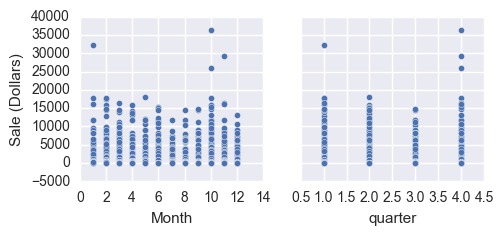

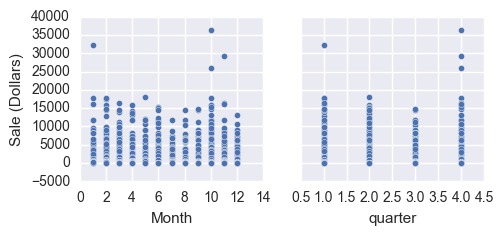

In [35]:
sns.pairplot(df, x_vars = ['Month', 'quarter'], y_vars = 'Sale (Dollars)')
plt.show()

In [57]:
df.quarter.value_counts()

1    102152
4     58291
2     55423
3     55089
Name: quarter, dtype: int64

In [75]:
#pd.get_dummies(df.quarter)
Quarters_Dummies = pd.get_dummies(df.quarter, prefix='Quarter').iloc[:,1:]
Quarters_Dummies

,Quarter_2,Quarter_3,Quarter_4
0,0.0,0.0,1.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,1.0,0.0
5,1.0,0.0,0.0
6,0.0,1.0,0.0
7,1.0,0.0,0.0
8,0.0,0.0,0.0
9,0.0,0.0,1.0


In [76]:
df = pd.concat([df, Quarters_Dummies], axis=1)
df

,Date,Store_Number,City,Zip_Code,County_Number,County,Category,Category_Name,Vendor_Number,Item_Nymber,...,State_Bottle_Retail,Bottles_Sold,Sale(Dollars),Volume_Sold(Liters),Volume_Sold(Gallons),Month,quarter,Quarter_2,Quarter_3,Quarter_4
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,...,6.75,12,81.00,9.00,2.38,11,4,0.0,0.0,1.0
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,...,20.63,2,41.26,1.50,0.40,3,1,0.0,0.0,0.0
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,...,18.89,24,453.36,24.00,6.34,2,1,0.0,0.0,0.0
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,...,14.25,6,85.50,10.50,2.77,2,1,0.0,0.0,0.0
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,...,10.80,12,129.60,21.00,5.55,8,3,0.0,1.0,0.0
5,2015-04-20,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,...,19.98,6,119.88,10.50,2.77,4,2,1.0,0.0,0.0
6,2015-08-05,2596,OTTUMWA,52501,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,...,9.99,3,29.97,2.25,0.59,8,3,0.0,1.0,0.0
7,2015-06-25,3456,CLEAR LAKE,50428,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,10628,...,23.63,2,47.26,3.50,0.92,6,2,1.0,0.0,0.0
8,2016-01-04,4757,BONDURANT,50035,77.0,Polk,1032080.0,IMPORTED VODKA,370,34006,...,17.24,4,68.96,3.00,0.79,1,1,0.0,0.0,0.0
9,2015-11-10,4346,SHELLSBURG,52332,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,65,82610,...,11.43,2,22.86,2.00,0.53,11,4,0.0,0.0,1.0


In [73]:
df

,Date,Store_Number,City,Zip_Code,County_Number,County,Category,Category_Name,Vendor_Number,Item_Nymber,Item_Description,Bottle_Volume(ml),State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale(Dollars),Volume_Sold(Liters),Volume_Sold(Gallons),Month,quarter
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.00,2.38,11,4
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.50,0.40,3,1
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.00,6.34,2,1
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.50,2.77,2,1
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.00,5.55,8,3
5,2015-04-20,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,New Amsterdam Gin,1750,13.32,19.98,6,119.88,10.50,2.77,4,2
6,2015-08-05,2596,OTTUMWA,52501,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,Korbel Brandy,750,6.66,9.99,3,29.97,2.25,0.59,8,3
7,2015-06-25,3456,CLEAR LAKE,50428,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,10628,Canadian Club Whisky,1750,15.75,23.63,2,47.26,3.50,0.92,6,2
8,2016-01-04,4757,BONDURANT,50035,77.0,Polk,1032080.0,IMPORTED VODKA,370,34006,Absolut Swedish Vodka 80 Prf,750,11.49,17.24,4,68.96,3.00,0.79,1,1
9,2015-11-10,4346,SHELLSBURG,52332,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,65,82610,Dekuyper Hot Damn!,1000,7.62,11.43,2,22.86,2.00,0.53,11,4


## Record your findings

Be sure to write out anything observations from your exploratory analysis.

## Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

## Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

In [51]:
df2 = df.groupby(["Store Number","quarter"]).agg({"quarter" : { "Sale (Dollars)" : "sum" } }).reset_index()

  
df2.columns = ["Store Number", "Quarter", "totalSalesForQuarter"]

 
join = pd.merge(df, df2, left_on=["Store Number","quarter"], right_on = ["Store Number","Quarter"] )
join.head(150)
join[ join.Quarter != 1 ].head()

KeyError: 'Store Number'

## Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [4]:
from sklearn import linear_model

## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

## Present the Results

Present your conclusions and results, including a Tableau Storyboard. If you have more than one interesting model feel free to include.

In [ ]:
#blog link: 

Score | /24
----|----
Identify: Problem Statement and Risks | 
Acquire: Import with Pandas| 
Parse: EDA | 
Mine: Create columns/clean/format/process data| 
Refine: Determine outliers and distribution, correlation, & statistical analysis| 
Model: Create linear models; calculate probabilities, evaluate model, perform CV| 
Present: Create executive summary, present findings, summarize, tailored for your audience|
Present: Blog |
Bonus: perform Ridge and Lasso regularization and explain what they do | 